# Análisis exploratorio de los datos #

In [1]:
#Importe de librerías a usar
import pandas as pd
import csv
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow as pa
import pyarrow.parquet as pq

In [2]:
archivo="steam_games.parquet"
steam_games= pd.read_parquet(archivo)
archivo="user_items.parquet"
user_items= pd.read_parquet(archivo)
archivo="user_review.parquet"
user_review= pd.read_parquet(archivo)
archivo="df_s_analisis.parquet"
df_s_analisis= pd.read_parquet(archivo)

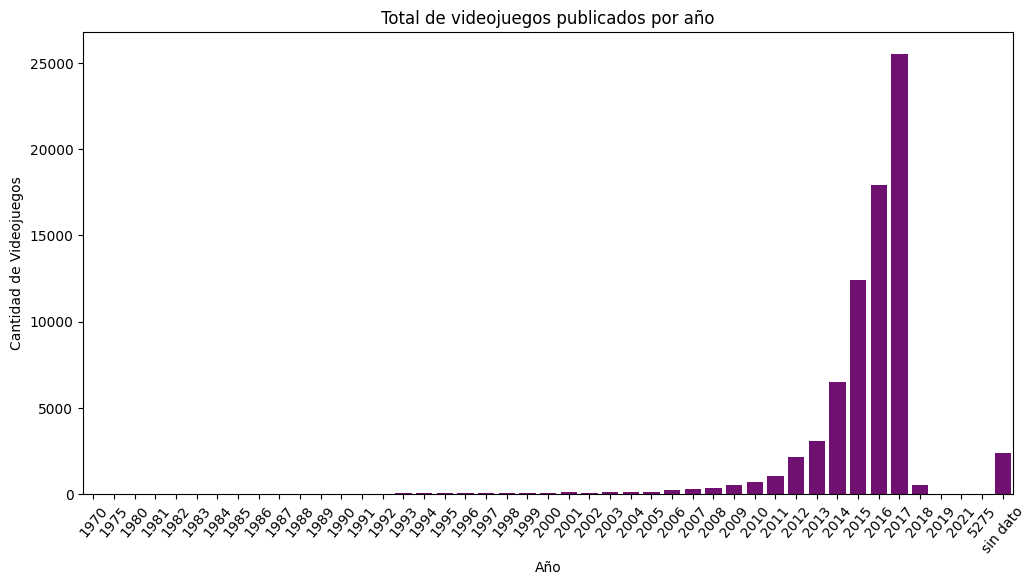

In [3]:
#Cantidad de videojuegos publicados por año
juegos_año = steam_games['Año'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=juegos_año.index, y=juegos_año.values, color='purple')
plt.xticks(rotation=50)

plt.xlabel('Año')
plt.ylabel('Cantidad de Videojuegos')
plt.title('Total de videojuegos publicados por año')

plt.show()

Podemos notar que entre el  año con 2016 y 2017 fue cuando mas se publicaron juegos

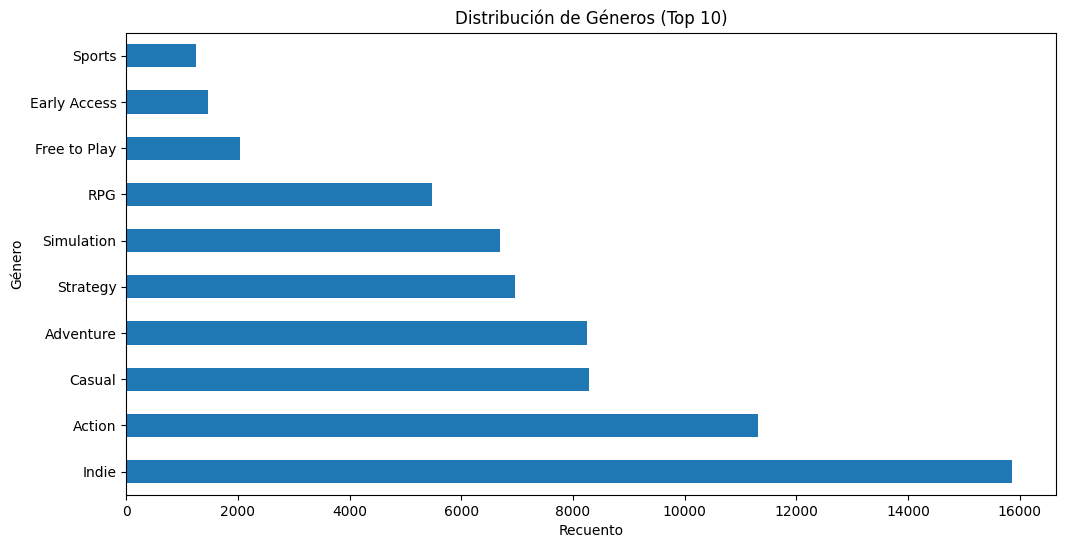

In [5]:
# Top 10 Géneros (Genres)
plt.figure(figsize=(12, 6))
steam_games['genres'].value_counts().head(10).plot(kind='barh')
plt.title('Distribución de Géneros (Top 10)')
plt.xlabel('Recuento')
plt.ylabel('Género')
plt.show()

Identificamos los 10 generos mas populares y podemos notar que en los tres primero existe una diferencia de 4000 entre cada uno en la escala

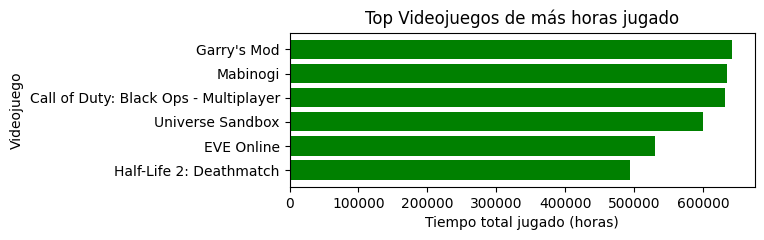

In [6]:
#Los juegos con mayor tiempo jugado
top_playtime = user_items.sort_values(by='playtime_forever', ascending=False).head(10)
plt.figure(figsize=(6, 2))  
plt.barh(top_playtime['item_name'], top_playtime['playtime_forever'], color='green')
plt.xlabel('Tiempo total jugado (horas)')  
plt.ylabel('Videojuego')         
plt.title('Top Videojuegos de más horas jugado')  

plt.gca().invert_yaxis()  # Invertir el eje Y para que el juego con más tiempo jugado esté en la parte superior.
plt.show()

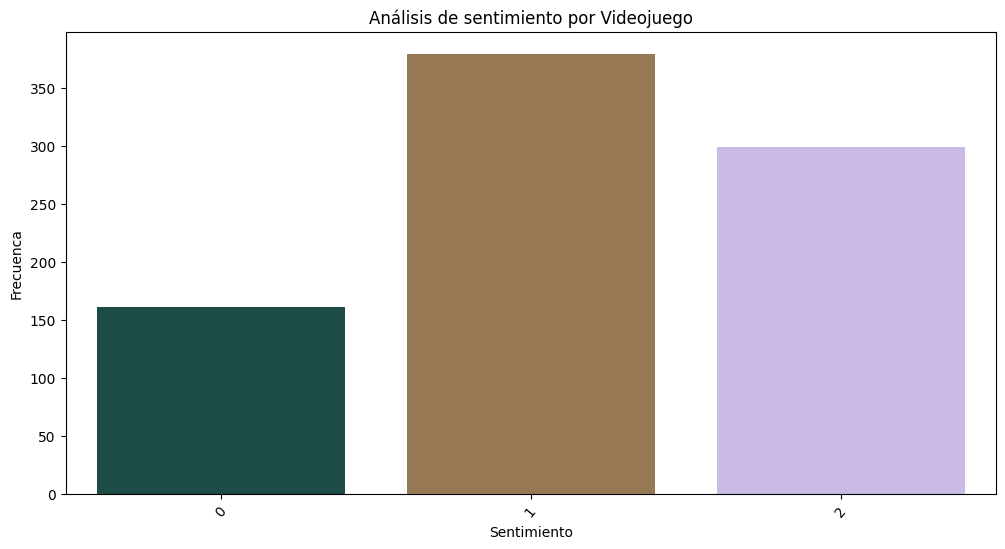

In [20]:
df_analisis = df_s_analisis['sentiment_analisis'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=df_analisis.index, y=df_analisis.values,  palette=("cubehelix"))
plt.xticks(rotation=50)

plt.xlabel('Sentimiento')
plt.ylabel('Frecuenca')
plt.title('Análisis de sentimiento por Videojuego')

plt.show()

Podemos notar que la mayoria de los sentimientos generados por los juegos son neutrales y positivos